In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
import MESS

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
pis = np.random.random(10)/10
dxys = np.random.random(10)/10
abunds = np.random.randint(1, 100, 10)
trts = np.random.random(10)*10

dat = pd.DataFrame([], columns=["pi", "dxy", "abundance", "trait"])
dat["pi"] = pis
dat["dxy"] = dxys
dat["abundance"] = abunds
dat["trait"] = trts
display(dat)
print(np.mean(dat["pi"]))

,pi,dxy,abundance,trait
0,0.061524,0.012547,25,8.373123
1,0.050091,0.003201,95,6.885184
2,0.068757,0.081749,86,0.166172
3,0.024586,0.098581,81,8.634071
4,0.061391,0.019568,25,8.631752
5,0.083039,0.084844,22,8.357796
6,0.022420,0.004208,12,0.514450
7,0.007190,0.036422,44,2.639291
8,0.042944,0.053604,67,3.300514
9,0.006464,0.050305,97,1.225311


0.042840578005816476


In [24]:
np.array(np.ones(10))
for p in ["abundance", "pi"]:
    if p == "abundance":
        vals = None
    else:
        vals = dat[p]
    for i in range(0, 5):
        hval = MESS.stats.generalized_hill_number(abunds=dat["abundance"], vals=vals, order=i)
        print(p, i, hval)


('abundance', 0, 0.018050541516245487)
('abundance', 1, 0.01511586232951983)
('abundance', 2, 0.013613800560279159)
('abundance', 3, 0.012827018294598572)
('abundance', 4, 0.01237031323280801)
('pi', 0, 0.019785401091518783)
('pi', 1, 0.016303043756248577)
('pi', 2, 0.014342655325855783)
('pi', 3, 0.013321207792545876)
('pi', 4, 0.012756041062969035)


In [ ]:

print("pi order 0 - {}".format(watdo(dat["abundance"], dat["pi"], order=0)))
print("Abund order 0 - {}".format(watdo(dat["abundance"], np.ones(len(dat["abundance"])), order=0)))

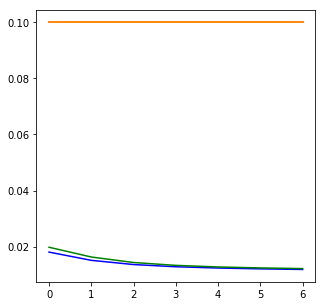

In [25]:
watdo = MESS.stats.generalized_hill_number
fig, ax = plt.subplots(figsize=(5, 5))
xs = list(range(0,7))

## Rand abund even pi
abunds = dat["abundance"]
even_pi = np.array([0.04] * 10)
ys = [watdo(abunds, even_pi, i) for i in xs]
ax.plot(xs, ys, c='b')

## Even abund even pi
abunds = np.array([10] * 10)
even_pi = np.array([0.04] * 10)
ys = [watdo(abunds, even_pi, i) for i in xs]
ax.plot(xs, ys, c='r')
#vals = np.ones(len(dat["abundance"]))

## Rand abund rand pi
abunds = dat["abundance"]
vals = dat["pi"]
ys = [watdo(abunds, vals, i) for i in xs]
ax.plot(xs, ys, c='g')

## even abund rand pi
abunds = np.array([10] * 10)
vals = dat["pi"]
ys = [watdo(abunds, vals, i) for i in xs]
ax.plot(xs, ys, c='orange')


## Trash below here

In [3]:
df = pd.read_csv("/home/isaac/Continuosity/MESS/MESS/default_MESS/SIMOUT.txt", sep="\t", header=0)
df

,S_m,J_m,birth_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,sigma,sequence_length,J,m,speciation_rate,background_death,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,100,750000,2.0,0.7,2.0,5.0,0.5,neutral,point_mutation,2.200000e-08,2000.0,570.0,500.0,0.0100,0.0000,0.25,102.0,0.514,0.011412,0.002745,0.588235,-3.777354,9.0,4.124061,2.580352,2.140850,1.975085,4.262426,3.875598,3.648355,3.500559,0.000827,0.000951,0.735832,-0.948599,0.000351,0.001287,0.006296,0.006646,1.382599e+00,1.096474,0.003333,0.006140,0.0,-2.648224,3.584318,1.078116,0.026532,-3.983266,1.977836,-2.853151,4.039792,0.800444,-0.322071,-4.178504,4.458470,-0.204927,0.455474,-0.277672,-0.348604,-0.195238,2.480634,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
1,100,750000,2.0,0.7,2.0,5.0,0.5,neutral,point_mutation,2.200000e-08,2000.0,570.0,500.0,0.0000,0.0100,0.25,71.0,0.522,0.000000,0.008845,0.588235,0.244656,17.0,5.073535,3.261664,2.806502,2.604717,1.000000,1.000000,1.000000,1.000000,0.000021,0.000083,3.750000,12.062500,0.000000,0.000000,0.001166,0.000412,3.690236e+00,11.764675,0.001053,0.000000,0.0,2.930893,0.518498,-0.344737,-0.627547,2.959422,0.753030,1.698119,2.173528,-1.432751,2.014443,2.409359,2.064753,-1.232774,1.655031,-1.088014,2.641989,-0.550063,1.311723,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100,750000,2.0,0.7,2.0,5.0,0.5,neutral,point_mutation,2.200000e-08,2000.0,570.0,500.0,0.0001,0.0100,0.25,149.0,0.512,0.000081,0.009262,0.588235,-3.421302,17.0,5.222435,3.389739,2.829740,2.580513,4.778016,4.615018,4.494057,4.401397,0.000202,0.000331,1.196131,-0.294511,0.000000,0.000351,0.008277,0.000439,2.614122e+00,6.236959,0.008070,0.000175,0.0,1.217452,0.841168,-0.881240,1.056172,1.416904,0.858061,0.900414,1.453760,-1.991267,4.836072,1.264823,1.135205,-0.317038,0.612592,-1.110027,3.779900,-0.152081,0.277144,12.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,100,750000,2.0,0.7,2.0,5.0,0.5,neutral,point_mutation,2.200000e-08,2000.0,570.0,500.0,0.0001,0.0010,0.25,528.0,0.506,0.000083,0.000924,0.588235,1.515994,3.0,2.404399,2.239381,2.184853,2.160689,1.000000,1.000000,1.000000,1.000000,0.000546,0.000772,0.707107,-1.500000,0.000000,0.000819,0.011404,0.001432,-1.876163e-15,-1.500000,0.011404,0.001754,0.0,-2.626877,0.419134,0.669664,-1.500000,-2.865670,0.469834,-1.740996,1.965266,0.983906,-0.108694,-2.523352,2.753661,0.885881,1.546131,0.314241,1.391306,0.342319,2.283827,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100,750000,2.0,0.7,2.0,5.0,0.5,neutral,point_mutation,2.200000e-08,2000.0,570.0,500.0,0.0001,0.0010,0.25,609.0,0.526,0.000125,0.000992,0.588235,7.396215,4.0,3.549830,3.145920,2.849256,2.653962,2.000000,2.000000,2.000000,2.000000,0.000175,0.000175,0.000000,-2.000000,0.000175,0.000351,0.015965,0.000813,-1.128483e+00,-0.688480,0.016404,0.000614,0.0,0.843222,0.845558,-0.233030,-1.005669,0.909924,0.715643,1.605781,2.099046,0.639148,0.561753,1.044910,2.160440,0.762559,1.253488,0.872178,1.567422,0.134986,1.444797,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,100,750000,2.0,0.7,2.0,5.0,0.5,neutral,point_mutation,2.200000e-08,2000.0,570.0,500.0,0.0001,0.0010,0.25,1879.0,0.500,0.000115,0.001067,0.588235,-1.152858,3.0,2.383298,2.220880,2.168264,2.144668,1.994086,1.988235,1.982481,1.976854,0.000507,0.000362,-0.652012,-1.500000,0

  No dxy data present
  No trait data present
  No dxy data present
  No trait data present


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,26,15.551964,11.553471,9.749593,8.776689,16.525113,13.293617,11.35714,10.189882,0.022862,0.022351,1.469762,1.797334,0.020936,0.019995,0,10,2,6,4,1,0,1,0,1,1


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,27,12.342967,8.390983,7.234338,6.756258,17.708787,14.927681,13.310007,12.280974,0.025299,0.022751,0.947168,0.086781,0.019174,0.028364,0,7,4,3,3,4,2,1,0,0,3


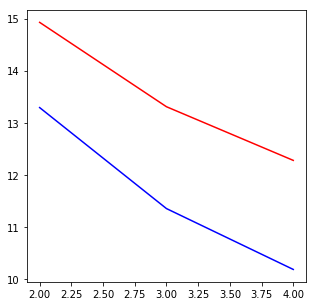

In [150]:
m_df = pd.read_csv("/home/isaac/SGD_empirical/empirical_weevils/mauritius.dat", header=0)
r_df = pd.read_csv("/home/isaac/SGD_empirical/empirical_weevils/reunion.dat", header=0)
m_ss = MESS.stats.calculate_sumstats(m_df)
r_ss = MESS.stats.calculate_sumstats(r_df)

display(m_ss)
display(r_ss)

fig, ax = plt.subplots(figsize=(5, 5))
xs = range(2, 5)
ys = [m_ss["pi_h{}".format(i)] for i in xs]
ax.plot(xs, ys, c='b')
ys = [r_ss["pi_h{}".format(i)] for i in xs]
ax.plot(xs, ys, c='r')

In [26]:
watdo(m_df["abundance"], m_df["pi"])/len(m_df)
fig, ax = plt.subplots(figsize=(5, 5))
xs = range(2, 7)
ys = [watdo(m_df["abundance"], m_df["pi"], i) for i in xs]
ax.plot(xs, ys, c='b')
ys = [watdo(r_df["abundance"], r_df["pi"], i) for i in xs]
ax.plot(xs, ys, c='r')

NameError: name 'm_df' is not defined

(array([ 5.,  2.,  6.,  3.,  2.,  9., 11.,  9.,  6.,  4.,  5.,  7.,  4.,
         3.,  4.,  3.,  6.,  7.,  2.,  2.]),
 array([0.0001   , 0.0001445, 0.000189 , 0.0002335, 0.000278 , 0.0003225,
        0.000367 , 0.0004115, 0.000456 , 0.0005005, 0.000545 , 0.0005895,
        0.000634 , 0.0006785, 0.000723 , 0.0007675, 0.000812 , 0.0008565,
        0.000901 , 0.0009455, 0.00099  ]),
 <a list of 20 Patch objects>)

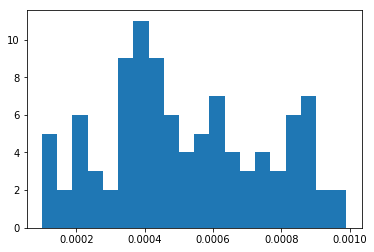

In [94]:
r = MESS.Region("watdo-tmp")
## Region params
r.set_param("project_dir", "/tmp")
r.set_param("generations", 0)
r.set_param("community_assembly_model", "neutral")
r.set_param("mutation_rate", 2.2e-8)
r.set_param("S_m", (500, 5000))
r.set_param("J", (1000, 2000))
r.set_param("m", (0.001, 0.01))
r.set_param("speciation_prob", (0.0001, 0.001))
plt.hist(MESS.util.sample_param_range(r.islands["Loc1"]._priors["speciation_prob"], nsamps=100), bins=20)